In [1]:
#default_exp utils

In [2]:
#export
from fastai.vision.all import *

In [6]:
import PIL
from typing import List
from torchvision.utils import make_grid

In [8]:
#export
def open_image(fname:Union[str,Path], size:tuple=None, as_array=False, as_tensor=False):
    'Open a _single_ image from disk, optionally resize and/or convert to array'
    img = PIL.Image.open(fname).convert('RGB')
    if isinstance(size, float): size = L(img.size).map(lambda x: int(x*size))
    if size is not None: img = img.resize(size)
    if as_array or as_tensor:
        img = np.array(img).transpose(2,0,1)
        if as_array: return img
        if as_tensor: return torch.from_numpy(img)
    return img

def make_img_grid(fnames : List[str],
                  img_size : Union[tuple, float, None] = (480,270),
                  ncol : int = 8
                 ) -> PIL.Image.Image:
    """
    Make a grid of images from `fnames` with `ncol` columns.
    `img_size` must be used unless all images are of the same size
    """
    img_list = [open_image(f, as_tensor=True, size=img_size) for f in fnames]
    grid_array = make_grid(img_list, nrow=ncol)
    grid_array = grid_array.numpy().transpose((1,2,0))
    return PIL.Image.fromarray(grid_array)

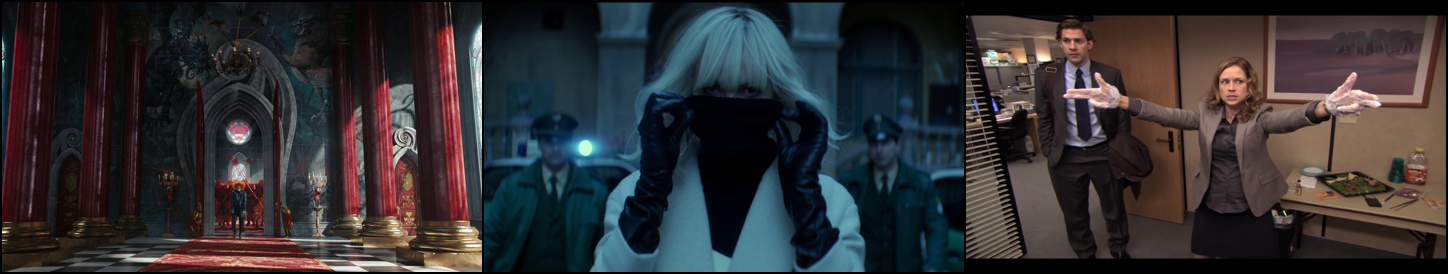

In [9]:
path = "../assets/imgs/"

files = get_image_files(path)
make_img_grid(files)

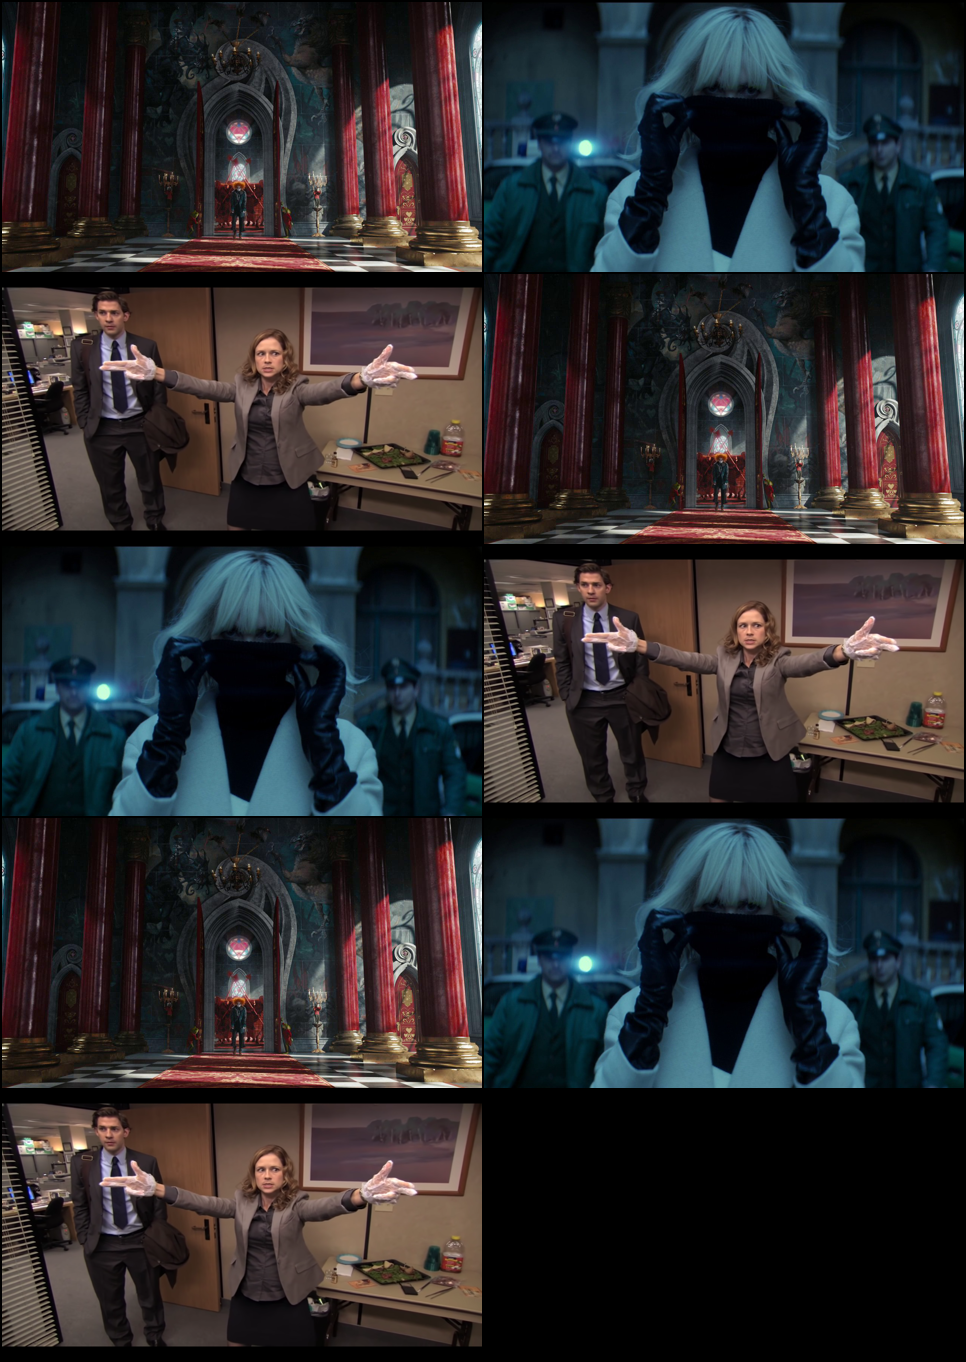

In [19]:
make_img_grid(files * 3, ncol=2)